<a href="https://colab.research.google.com/github/AshutoshKumarDubey/EDA_Capstone_Project_Airbnb/blob/main/EDA_Airbnb_Bookings_Analysis_By_Ashutosh_Kumar_Dubey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the libraries, mounting the drive and loading the dataset**

In [ ]:
#Importing the required libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the CSV file
df=pd.read_csv("/content/drive/MyDrive/Exploratory Data Analysis (EDA)- Capstone Project/Airbnb NYC 2019.csv")

# **Understanding the Data**

In [ ]:
#To know the number of rows and columns in the Dataset loaded.
df.shape

(48895, 16)

**We can see that the Dataset has 48895 rows and 16 columns in the uncleaned form.**

In [ ]:
#Seeing the information about the data and datatype in all 16 columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Looking at the first 5 rows of Data
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Looking at the last 5 rows of the Data
df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#Seeing the summary of data that is number of occurrences, mean, standard deviaion and different quartile values.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Missing Value Treatment**

In [ ]:
#To seee how many columns have what number of missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**The columns which contain missing values are name, host_name, price, last_review and reviews_per_month.**

In [ ]:
#Checking for Duplicate values
df.duplicated().sum()

0

**We can see that there are no duplicated values in the Dataset.**

**Now, last_review is an unimportant variable because it is a date.  'id'  and 'name' columns are not important because we have to do a data exploration on airbnb, so, host_name and host_id are more important variables for that analysis. So, we drop columns 'last_review', 'id', 'name' and replace null values in reviews_per_month with 0 and null values in host_name with ‘no name’.**

In [ ]:
#Dropping columns 'id','name' and 'last_review'.
df.drop(['id','name','last_review'],axis=1,inplace=True)

In [ ]:
#Replacing Null values in reviews_per_month column with 0.
df['reviews_per_month'].fillna(0 , inplace = True)

In [ ]:
# Replacing all Null values in host_name by 'no name'
df.host_name.fillna('No Name', inplace=True)

In [ ]:
#Now after treating missing values we see the dataset.
df.isna().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#Seeing the summary of the data
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**We observe that minimum value of Price variable is 0 and minimum_nights spent have values more than 365. So, we drop the rows containing these values.**

In [ ]:
#Dropping rows containing Price values equal to 0 and minimum_nights value more than 365
drop_price=df.index[df["price"] == 0].tolist()
drop_minimum_nights=df.index[df["minimum_nights"] >= 366].tolist()
c=drop_price+drop_minimum_nights
df=df.drop(df.index[c])

In [ ]:
#Seeing the minimum value in price column and maximum value in minimum_nights column
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887000e+04,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000
mean,6.762985e+07,40.728952,-73.952172,152.759402,6.840311,23.277143,1.091070,7.146286,112.728443
std,7.862005e+07,0.054534,0.046163,240.199363,16.453077,44.556389,1.597354,32.960753,131.596499
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.821708e+06,40.690092,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.080150e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763127,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


**Now, when we see the summary of data we see that the maximum value of minimum_nights is 365 which is total number of days in an year and minimum price value is non-zero.**

In [ ]:
#Since arithmetics cannot be performed on the basis of magnitude of variables host_id, latitude and longitude. Therefore, their type should be changed from 'int64' and 'float64' to 'object'.
df.host_id=df.host_id.astype('object')
df.latitude=df.latitude.astype('object')
df.longitude=df.longitude.astype('object')

# **Correlation Check**

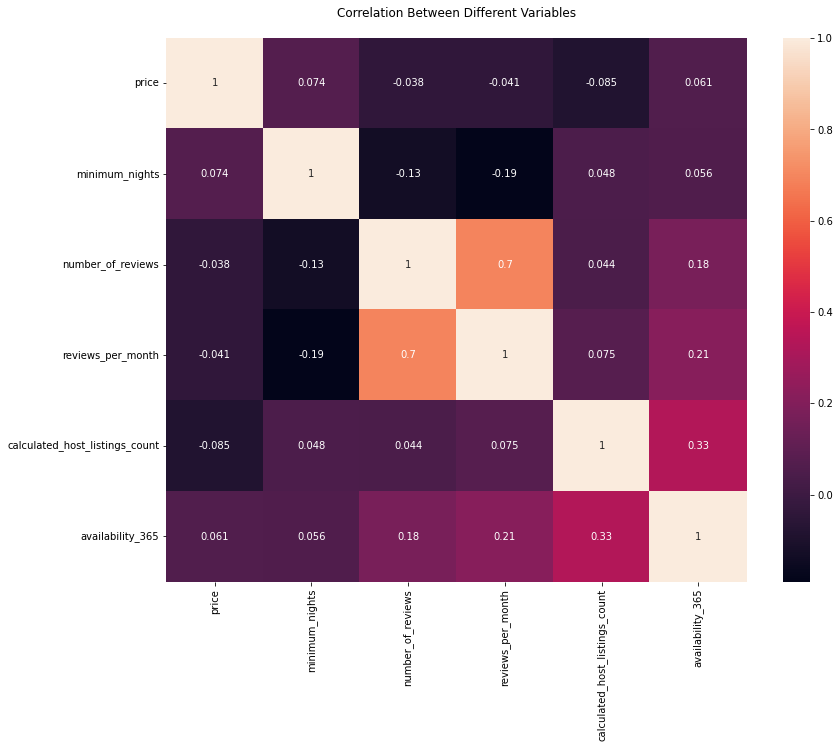

In [ ]:
#We need to see the correlation among the columns to understand the trend better
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

**Why this plot was used?**

Heatmap was used because they
display a more generalized view of numeric values. They are 
extremely versatile and efficient in drawing attention to trends. Also,
they rely on color to communicate values, self-explanatory, result is a data visualization that quickly communicates its data to the viewer. 

**Inference**

From the graph above, we can see that there is not a strong correlation among any of the variables which is a good thing for our analysis.

**Business Implication**

This gives us the features which can be grouped together or removed to make the model rightly interpretable. A rightly interpreted model can be used to make business decisions.

# **Univariate Analysis**

## **To know of outliers in the different feature columns (boxplots) and shape of distribution of data points in all features (kde plots)**

## **Boxplot Analysis of Numerical Variables**

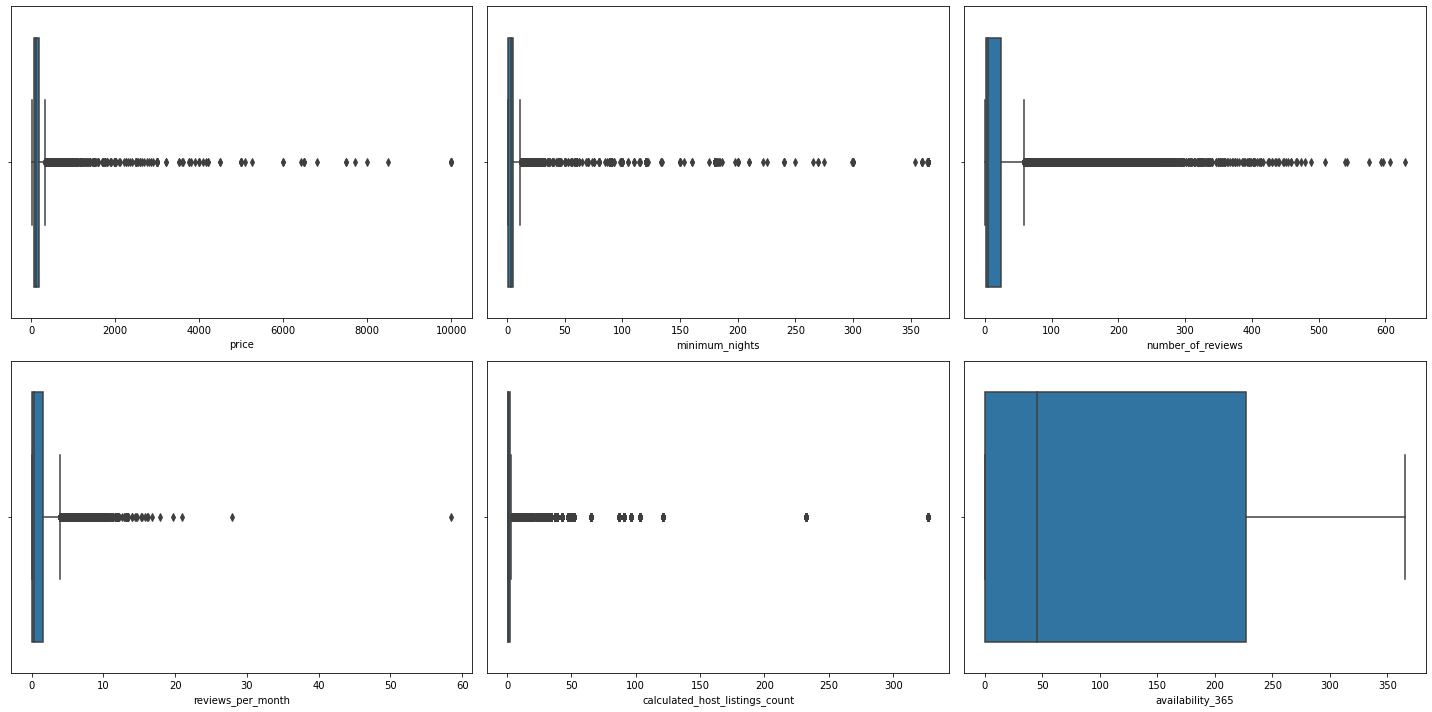

In [ ]:
#Creating a boxplot for numerical features using for loop.
cols = 3
rows = 2
num_cols = df.select_dtypes(exclude=['object']).columns
fig = plt.figure(figsize= (20,10))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

**Why this plot was chosen?**

To detect noise in the data that is outliers.


**Inference**

Outliers are present in all numerical features except availability_365. The values of outliers are much higher in value for all features: 'price', 'reviews_per_month',  'minimum_nights', 'calculated_host_listings_count' and 'number_of_reviews'.

**Business Implication**

We will be able to make better business decisions because we have got rid of the noise in data which could have impacted our choosing of best possible decision. 

## **Kde plot of Numerical Variables**

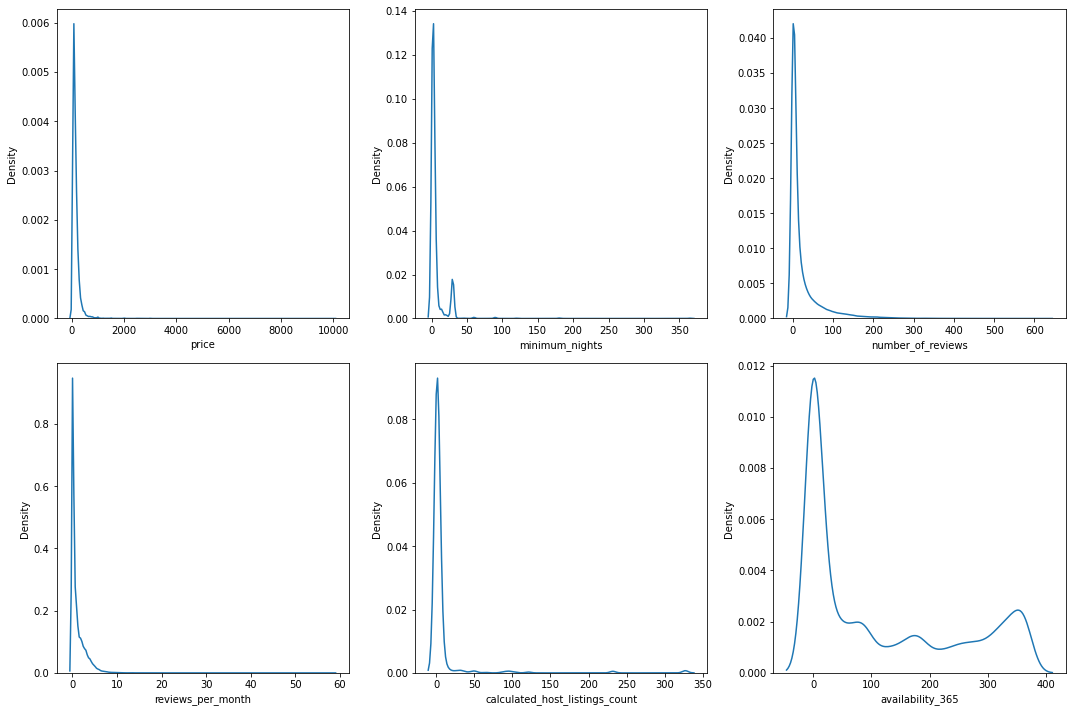

In [ ]:
#Creating a histplot for numerical features using for loop.
cols = 3
rows = 2
num_cols = df.select_dtypes(exclude=['object']).columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.kdeplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

**Why this plot was chosen?**

**A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset. KDE represents the data using a continuous probability density curve in one or more dimensions.KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distribution.**

**Inference**

**By using the KDE plot, we can infer the probability density function of the feature variable.**

**Business Implication**

**We can roughly understand the distribution of data points and corresponding values for a feature and make some basic inferences.**


